In [1]:
import numpy as np
import matplotlib.pyplot as plt

from algorithms.MOEAD import moead, default_weight_vectors
import algorithms.MOEAD.evolutionary_operators as moead_operators

# from algorithms.risk_measures import semi_variance

from data_loader import load_stock_quotations

%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 5]

In [2]:
def semi_variance(X):
    '''X is 2-dimensional array,
    this function returns 1-dimensional array
    containing semi-variances of each row of X'''

    X_mean = X.mean(axis=1).reshape(-1,1)
    X_diff = X - X_mean
    X_diff[X > X_mean] = 0
    return np.sum(X_diff**2, axis=1)

# Load data

In [3]:
stock_quotations = load_stock_quotations()

delta_t = 90
stock_returns = stock_quotations.xs('close', level=1, axis=1).pct_change()
last_returns = stock_returns[-delta_t-1:-1]

stock_returns_mean = last_returns.mean() # predicted return for next day

# variance as risk
stock_returns_var = last_returns.var() # risk
stock_returns_cov = last_returns.cov() # covariance matrix

# semi-variance as risk
stock_returns_semi_var = semi_variance(np.array(last_returns).T)

number_of_stocks = stock_returns.shape[1]

# Test semi-variance correctness

In [4]:
last_returns

,ALIOR,ALLEGRO,ASSECOPOL,CCC,CDPROJEKT,CYFRPLSAT,DINOPL,PGNIG,JSW,KGHM,LOTOS,LPP,ORANGEPL,PEKAO,PGE,PKNORLEN,PKOBP,PZU,SANPL,TAURONPE
time,,,,,,,,,,,,,,,,,,,,
2023-09-14,0.015686,0.010135,-0.007353,0.014184,-0.001604,0.000000,0.008065,0.0,0.071756,0.044454,0.0,-0.000767,0.006272,0.017937,-0.007918,0.012012,0.005095,0.022441,-0.001679,0.010943
2023-09-15,-0.002703,0.003292,-0.010101,-0.017716,-0.008995,0.032443,0.021067,0.0,0.026828,0.004299,0.0,-0.001536,0.027371,-0.004405,0.008496,0.009361,0.000845,-0.000482,-0.008969,-0.011340
2023-09-18,-0.034650,-0.029844,0.010884,-0.016611,-0.006159,-0.021442,0.015148,0.0,0.002312,-0.036815,0.0,-0.003077,-0.013189,-0.028515,-0.019658,-0.011096,-0.023917,-0.018822,-0.021493,-0.022419
2023-09-19,0.001805,-0.015945,-0.029610,-0.010376,-0.031963,-0.021534,-0.048109,0.0,0.022837,-0.008000,0.0,-0.003086,0.012563,0.025304,-0.023438,-0.015073,0.012972,-0.000984,0.012139,0.005867
2023-09-20,0.036829,0.006219,0.036061,0.024140,0.030997,0.020077,0.017027,0.0,0.029093,0.031810,0.0,0.027090,0.023231,0.025173,0.035733,0.007822,0.013944,0.013540,0.062821,0.017762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-17,-0.022979,-0.022341,-0.020804,-0.039461,-0.047619,-0.032758,-0.028102,0.0,-0.047836,-0.039891,0.0,-0.014304,-0.000938,-0.005903,-0.041677,-0.032365,-0.002053,-0.005830,-0.009095,-0.044039
2024-01-18,0.031069,0.013082,0.008499,-0.011982,-0.001000,0.009153,0.008086,0.0,0.004785,0.000944,0.0,-0.003298,-0.017602,0.021656,0.033825,0.006826,0.018519,0.005430,0.010927,0.026995
2024-01-19,-0.016897,0.030075,-0.013343,0.004851,-0.007007,-0.004989,0.006806,0.0,0.005026,0.010377,0.0,0.006618,0.006928,-0.016068,0.035916,0.015932,0.005657,0.003240,0.006917,0.027429


In [5]:
print(last_returns.shape)
print(semi_variance(np.array(last_returns)).shape)
print(semi_variance(np.array(last_returns).T).shape)
print(stock_returns_semi_var.shape)
print(stock_returns_semi_var)

(90, 20)
(90,)
(20,)
(20,)
[0.016854   0.02956952 0.01281787 0.02692316 0.03440945 0.02370289
 0.02759164 0.         0.04540802 0.01513526 0.         0.02238857
 0.00581124 0.01570219 0.02442204 0.01395725 0.01235302 0.0094643
 0.01411819 0.02363721]


In [6]:
def random_population(population_size, chromosome_length):
    population = np.random.random(size=(population_size, chromosome_length))
    return population / population.sum(axis=1).reshape(-1,1)

$X$ - populacja, każdy wiersz to osobnik (portfel) - wektor 20-wymiarowy

$L$ (zmienna `last_returns`) - stopy zwrotu poszczególnych spółek w poszczególnych dniach, element $L_{i,j}$ ($i$-ty wiersz, $j$-ta kolumna) to zwrot $j$-tej spółki w dniu $t_i$.
Macierz $L$ jest wymiaru liczba_dni $\times$ liczba_spółek, w tym przypadku $90 \times 20$

Stąd macierz $R = XL^T$ ma na pozycji $R_{i,j}$ iloczyn skalarny $i$-tego wiersza $X$ z $j$-tą kolumną $L^T$, czyli $j$-tym wierszem $L$. Jest to zatem iloczyn skalarny $i$-tego portfela z wektorem stóp zwrotu poszczególnych spółek w dniu $t_j$, czyli zwrot $i$-tego portfela w dniu $t_j$.

Tak więc $i$-ty wiersz macierzy $R$ zawiera stopy zwrotu całego $i$-tego portfela w kolejnych dniach. Zatem licząc semiwariancję każdego wiersza tej macierzy, otrzymujemy semiwariancję dla każdego portfela (osobnika w populacji $X$) - czyli jego funkcję ryzyka.

In [7]:
X = random_population(4,20)
print(X.shape)
print((X @ np.array(last_returns).T).shape)
print(semi_variance((X @ np.array(last_returns).T)))

(4, 20)
(4, 90)
[0.00592285 0.0045411  0.00476726 0.00468612]


# Objective function

In [8]:
def portfolio_return_value(X):
    return X @ stock_returns_mean


def portfolio_risk_var(X):
    return np.diag(X @ stock_returns_cov @ X.T)


def portfolio_risk_semi_var(X):
    return semi_variance(X @ np.array(last_returns).T)


def portfolio_objective_function(risk_function=portfolio_risk_semi_var,
                                 return_function=portfolio_return_value):
    return lambda X: np.c_[risk_function(X), -return_function(X)]

# Test

In [9]:
def show_results(stock_risk, objective_function, moead_kwargs):
    plt.xlabel('Risk')
    plt.ylabel('Return')
    plt.title(f"MOEA/D: iterations: {moead_kwargs['number_of_iterations']}, normalized: {moead_kwargs['normalize']}\n")
    plt.scatter(stock_risk, stock_returns_mean, c='gray', label='Basic stocks')

    moead_result = moead(objective_function=objective_function,
                         chromosome_length=number_of_stocks,
                         **moead_kwargs)

    pareto_front_moead = objective_function(moead_result)

    plt.scatter(pareto_front_moead[:,0], -pareto_front_moead[:,1], c='r', label='MOEA/D')

    plt.legend()
    plt.show()

## Normalization

MOEA/D: 100%|██████████| 200/200 [01:56<00:00,  1.72it/s]


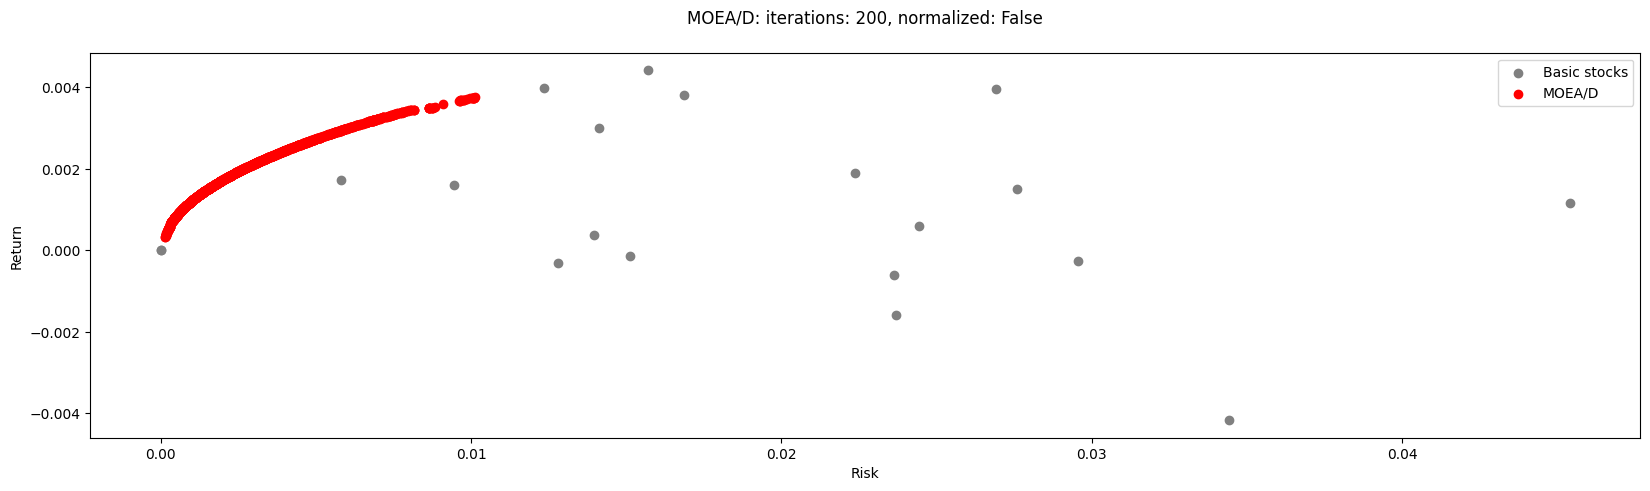

In [10]:
show_results(stock_risk=stock_returns_semi_var,
             objective_function=portfolio_objective_function(risk_function=portfolio_risk_semi_var),
             moead_kwargs={'number_of_iterations': 200,
                           'weight_vectors': default_weight_vectors(120),
                           'neighborhood_size': 20,
                           'mutation_probability': 0.2,
                           'normalize': False,
                           'crossover_operator': moead_operators.single_point_crossover,
                           'mutation_operator': moead_operators.swap_mutation})

MOEA/D: 100%|██████████| 200/200 [01:56<00:00,  1.72it/s]


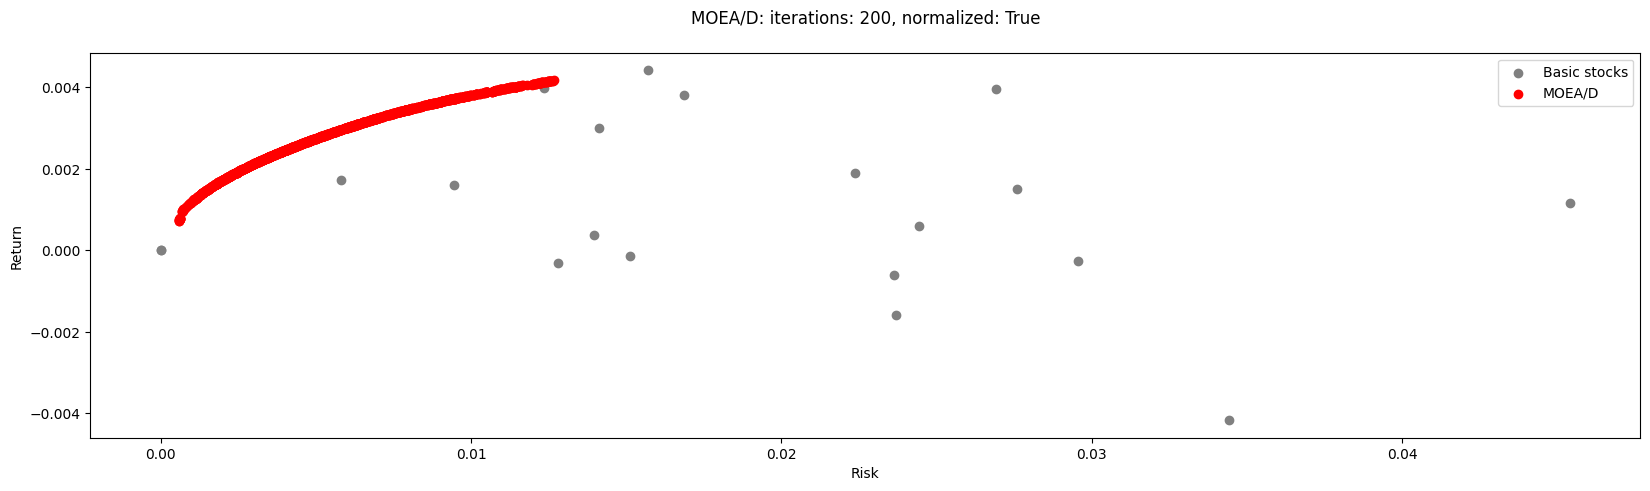

In [11]:
show_results(stock_risk=stock_returns_semi_var,
             objective_function=portfolio_objective_function(risk_function=portfolio_risk_semi_var),
             moead_kwargs={'number_of_iterations': 200,
                           'weight_vectors': default_weight_vectors(120),
                           'neighborhood_size': 20,
                           'mutation_probability': 0.2,
                           'normalize': True,
                           'crossover_operator': moead_operators.single_point_crossover,
                           'mutation_operator': moead_operators.swap_mutation})

## Different operators

### Crossover

MOEA/D: 100%|██████████| 200/200 [01:34<00:00,  2.13it/s]


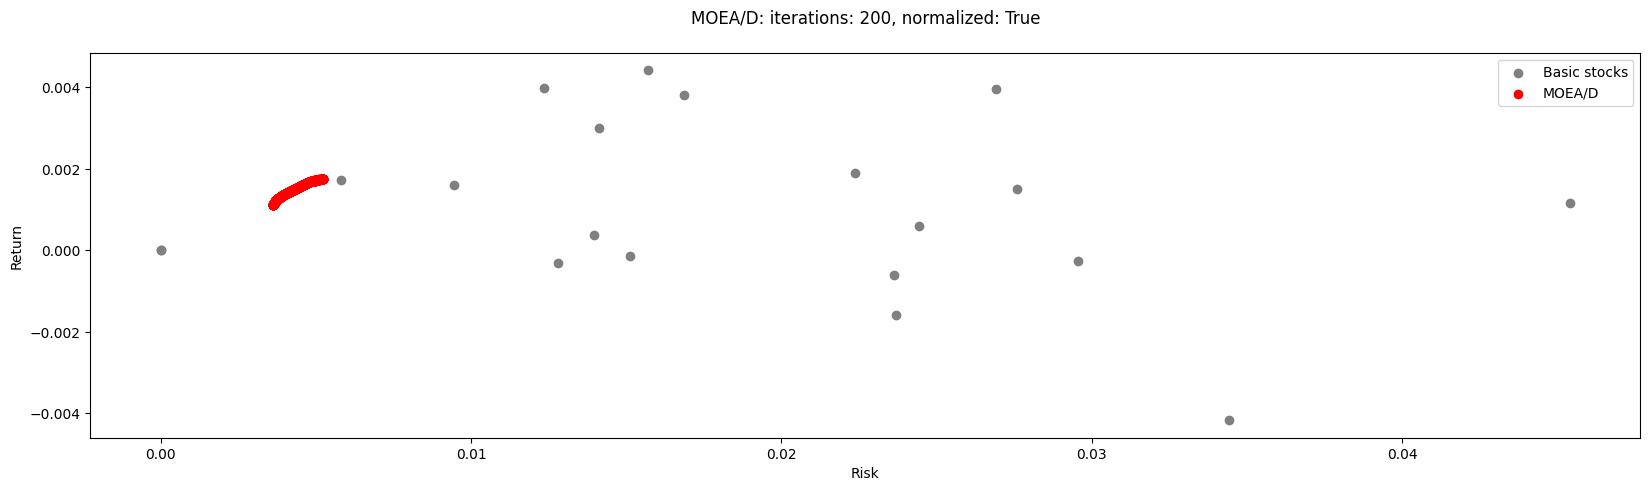

In [12]:
show_results(stock_risk=stock_returns_semi_var,
             objective_function=portfolio_objective_function(risk_function=portfolio_risk_semi_var),
             moead_kwargs={'number_of_iterations': 200,
                           'weight_vectors': default_weight_vectors(120),
                           'neighborhood_size': 20,
                           'mutation_probability': 0.2,
                           'normalize': True,
                           'crossover_operator': moead_operators.arithmetic_crossover,
                           'mutation_operator': moead_operators.swap_mutation})

MOEA/D: 100%|██████████| 200/200 [01:21<00:00,  2.45it/s]


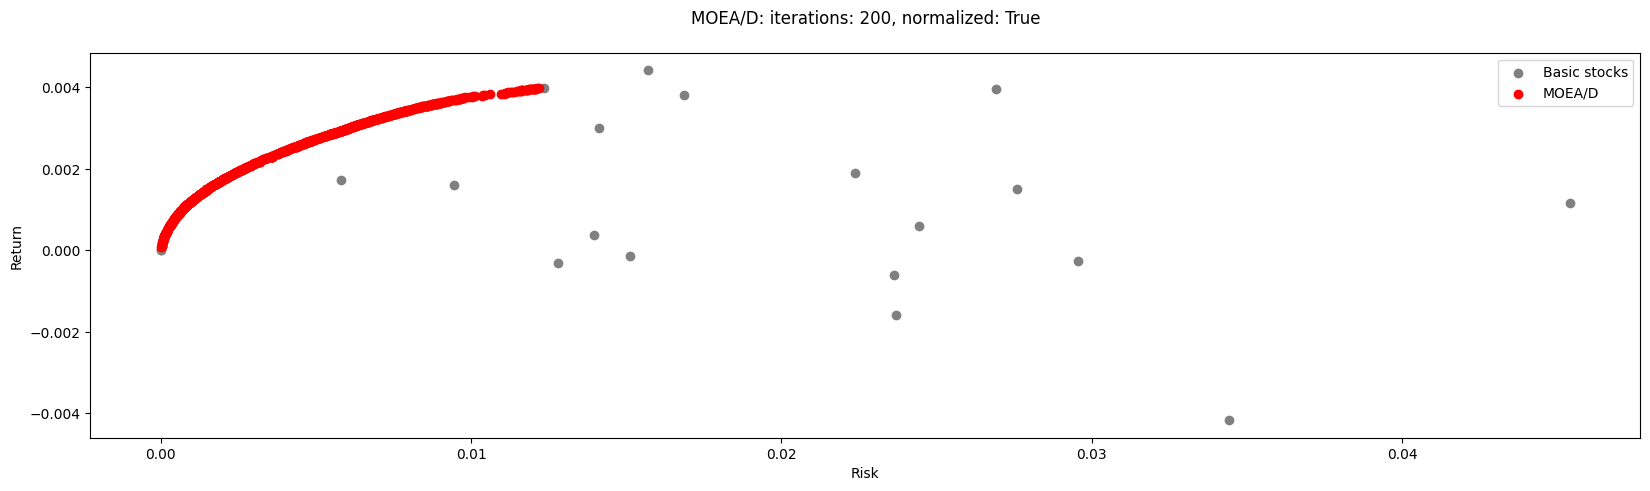

In [13]:
show_results(stock_risk=stock_returns_semi_var,
             objective_function=portfolio_objective_function(risk_function=portfolio_risk_semi_var),
             moead_kwargs={'number_of_iterations': 200,
                           'weight_vectors': default_weight_vectors(120),
                           'neighborhood_size': 20,
                           'mutation_probability': 0.2,
                           'normalize': True,
                           'crossover_operator': moead_operators.differential_crossover,
                           'mutation_operator': moead_operators.swap_mutation})

### Mutation

MOEA/D: 100%|██████████| 200/200 [01:45<00:00,  1.89it/s]


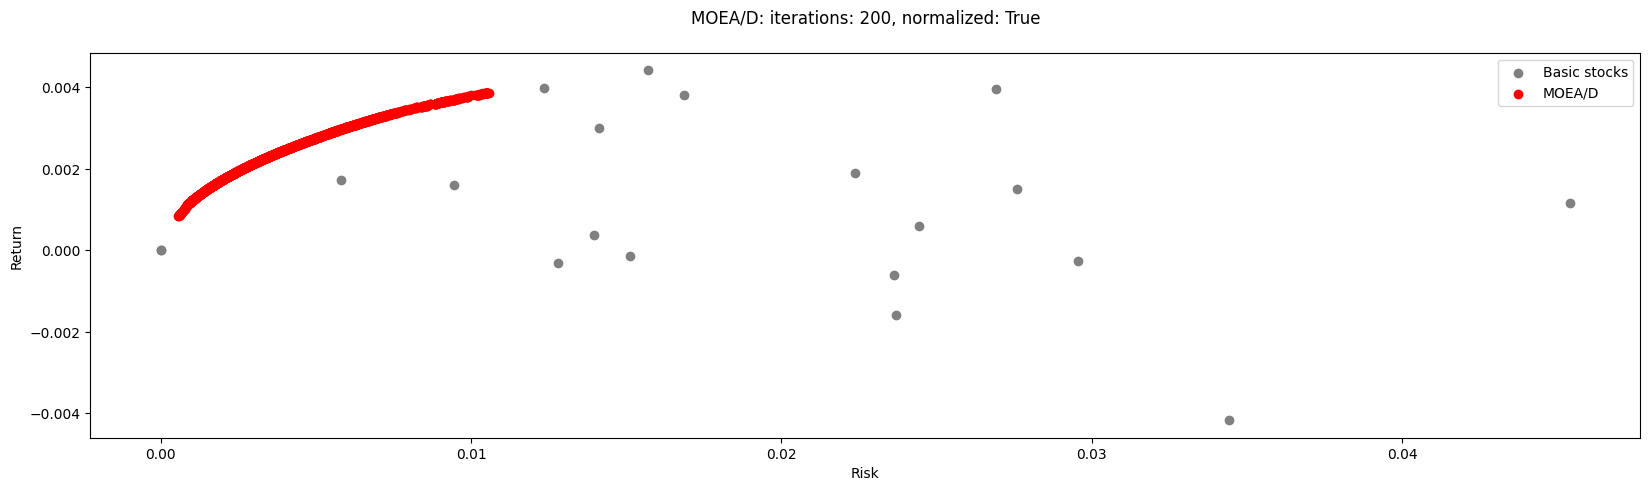

In [14]:
show_results(stock_risk=stock_returns_semi_var,
             objective_function=portfolio_objective_function(risk_function=portfolio_risk_semi_var),
             moead_kwargs={'number_of_iterations': 200,
                           'weight_vectors': default_weight_vectors(120),
                           'neighborhood_size': 20,
                           'mutation_probability': 0.2,
                           'normalize': True,
                           'crossover_operator': moead_operators.single_point_crossover,
                           'mutation_operator': moead_operators.change_pair_mutation})

MOEA/D: 100%|██████████| 200/200 [01:41<00:00,  1.97it/s]


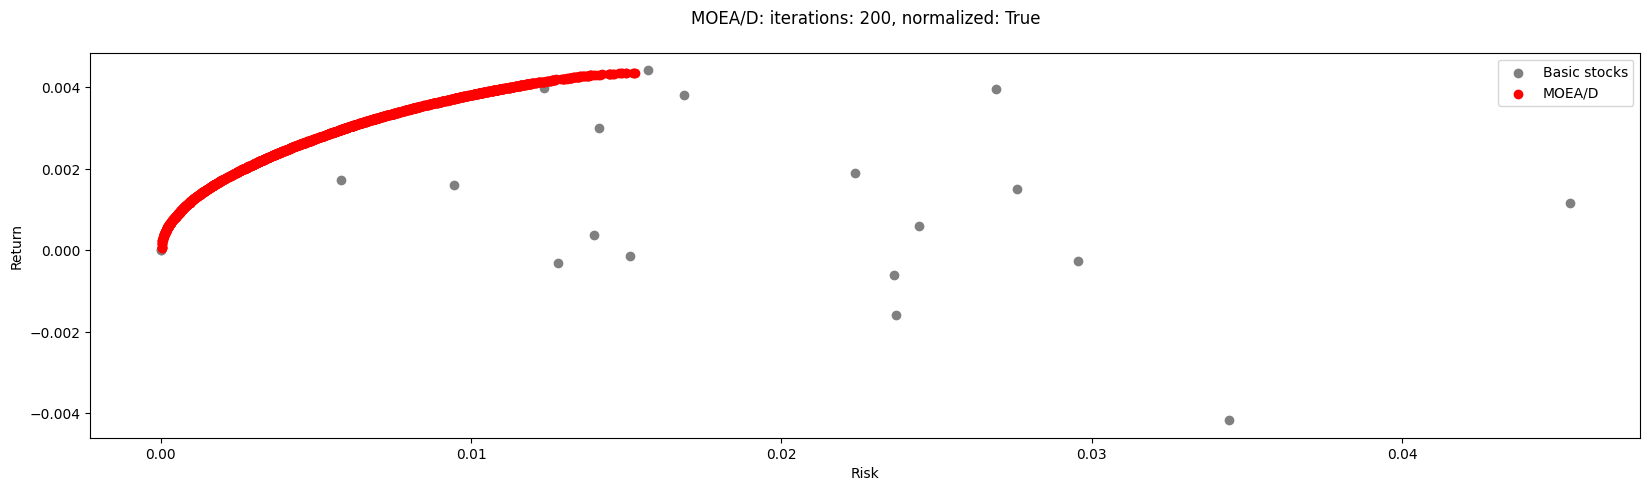

In [15]:
show_results(stock_risk=stock_returns_semi_var,
             objective_function=portfolio_objective_function(risk_function=portfolio_risk_semi_var),
             moead_kwargs={'number_of_iterations': 200,
                           'weight_vectors': default_weight_vectors(120),
                           'neighborhood_size': 20,
                           'mutation_probability': 0.2,
                           'normalize': True,
                           'crossover_operator': moead_operators.differential_crossover,
                           'mutation_operator': moead_operators.change_pair_mutation})

## Neighborhood size to number of weight vectors ratio

MOEA/D: 100%|██████████| 300/300 [03:02<00:00,  1.64it/s]


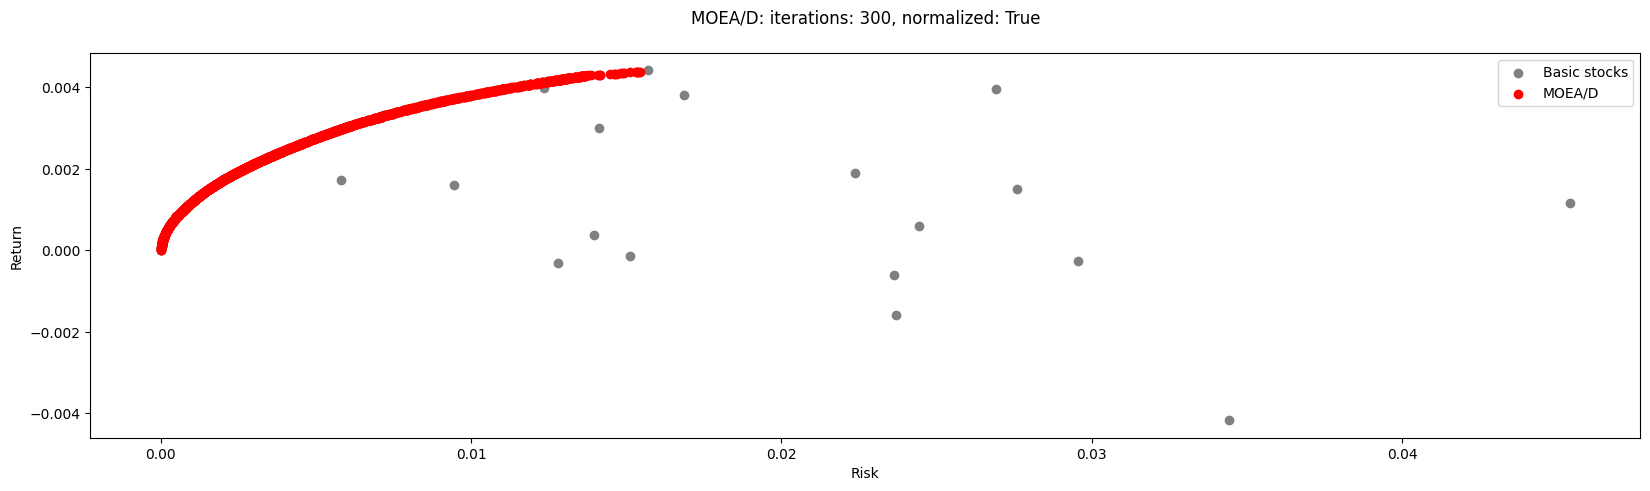

In [16]:
show_results(stock_risk=stock_returns_semi_var,
             objective_function=portfolio_objective_function(risk_function=portfolio_risk_semi_var),
             moead_kwargs={'number_of_iterations': 300,
                           'weight_vectors': default_weight_vectors(100),
                           'neighborhood_size': 25,
                           'mutation_probability': 0.16,
                           'normalize': True,
                           'crossover_operator': moead_operators.differential_crossover,
                           'mutation_operator': moead_operators.change_pair_mutation})

MOEA/D: 100%|██████████| 300/300 [02:55<00:00,  1.71it/s]


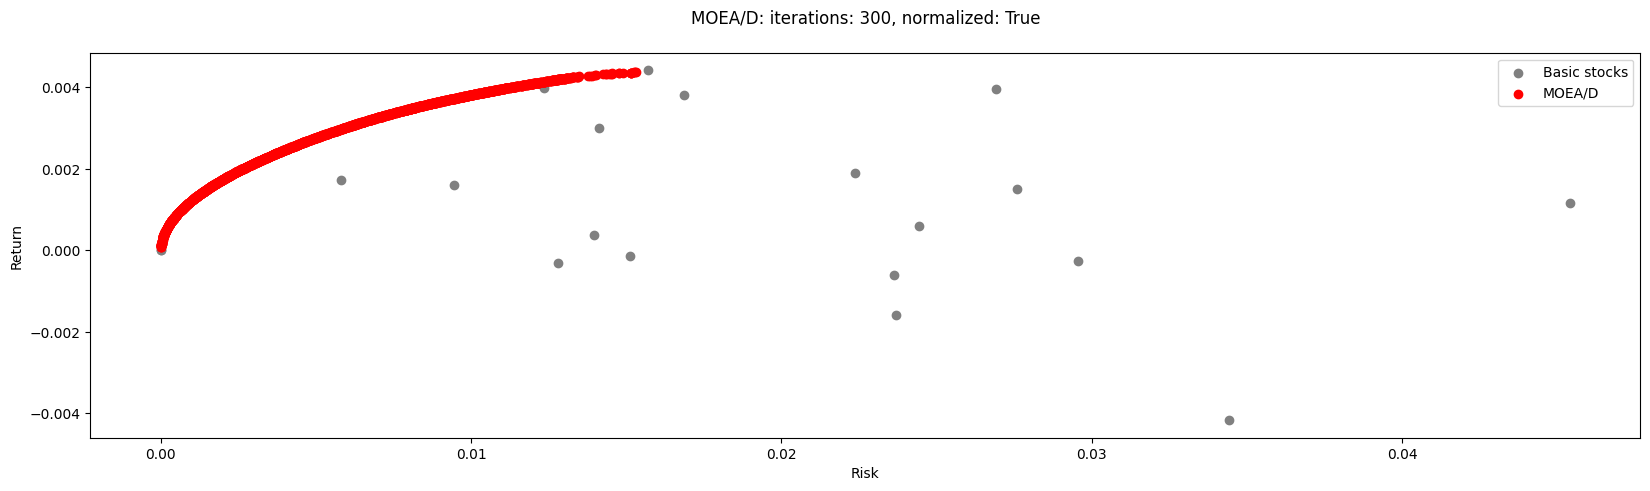

In [17]:
show_results(stock_risk=stock_returns_semi_var,
             objective_function=portfolio_objective_function(risk_function=portfolio_risk_semi_var),
             moead_kwargs={'number_of_iterations': 300,
                           'weight_vectors': default_weight_vectors(100),
                           'neighborhood_size': 33,
                           'mutation_probability': 0.16,
                           'normalize': True,
                           'crossover_operator': moead_operators.differential_crossover,
                           'mutation_operator': moead_operators.change_pair_mutation})

MOEA/D: 100%|██████████| 300/300 [02:53<00:00,  1.73it/s]


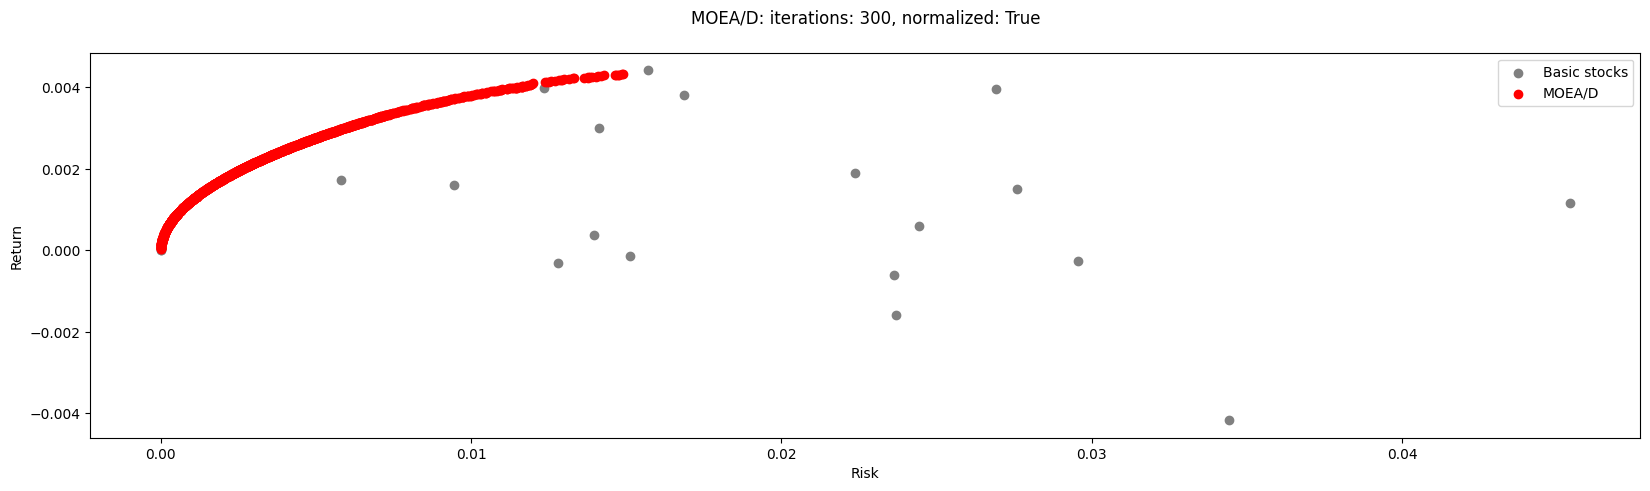

In [18]:
show_results(stock_risk=stock_returns_semi_var,
             objective_function=portfolio_objective_function(risk_function=portfolio_risk_semi_var),
             moead_kwargs={'number_of_iterations': 300,
                           'weight_vectors': default_weight_vectors(100),
                           'neighborhood_size': 50,
                           'mutation_probability': 0.16,
                           'normalize': True,
                           'crossover_operator': moead_operators.differential_crossover,
                           'mutation_operator': moead_operators.change_pair_mutation})